In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df=pd.read_csv('C:/Users/priya/Downloads/archive (2)/heart.csv')

In [ ]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
train_df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
train_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
import numpy as np

In [ ]:
three_std = 3
outliers = 0

# loop throgh whole dataframe
for i, j in enumerate(train_df.columns):
    # Check if std is greater than 0 for the math
    if train_df.std()[i] > 0:
        z_score = (i - train_df.mean()[i]) / train_df.std()[i] 
        # Uses z score to check for outliers amd adds it to a count 
        if np.abs(z_score) > three_std:
            outliers = outliers + 1

print(outliers)

12


In [ ]:
df_replace_nan = train_df.mask(train_df.sub(train_df.mean()).div(train_df.std()).abs().gt(3))

In [ ]:
df_replace_nan.isnull().sum().sum() 

56

In [ ]:
df_replace_median = df_replace_nan.fillna(df_replace_nan.median())


In [ ]:
df_replace_median.isnull().sum().sum()

0

In [ ]:
train_df[['fbs', 'target']].groupby(['fbs']).mean()

,target
fbs,
0,0.521789
1,0.464052


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

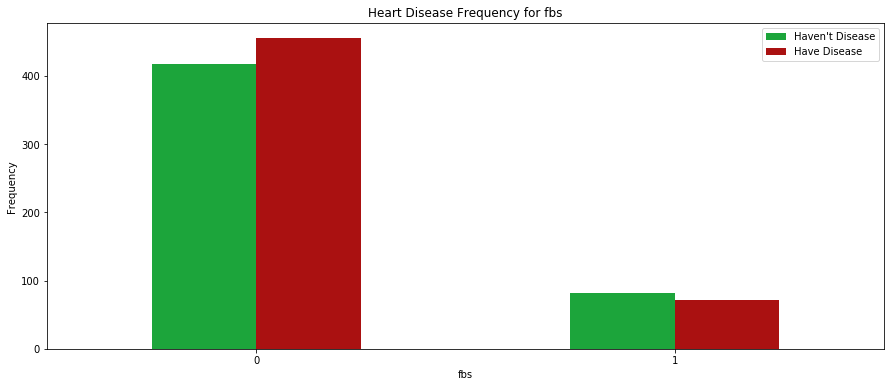

In [ ]:
pd.crosstab(train_df.fbs,train_df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for fbs')
plt.xlabel('fbs')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x1dc71bd1208>,
 <a list of 10 Text xticklabel objects>)

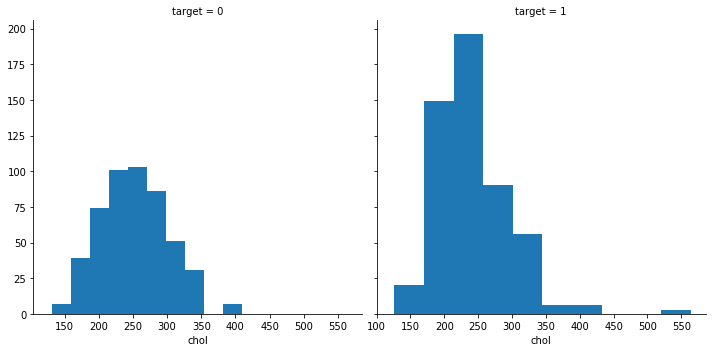

In [ ]:
grid=sns.FacetGrid(train_df, col ='target', size=5)
grid.map(plt.hist,"chol")
plt.xticks(range(100,600,50))

In [ ]:
train_df[['restecg', 'target']].groupby(['restecg']).mean()

,target
restecg,
0,0.430584
1,0.602339
2,0.200000


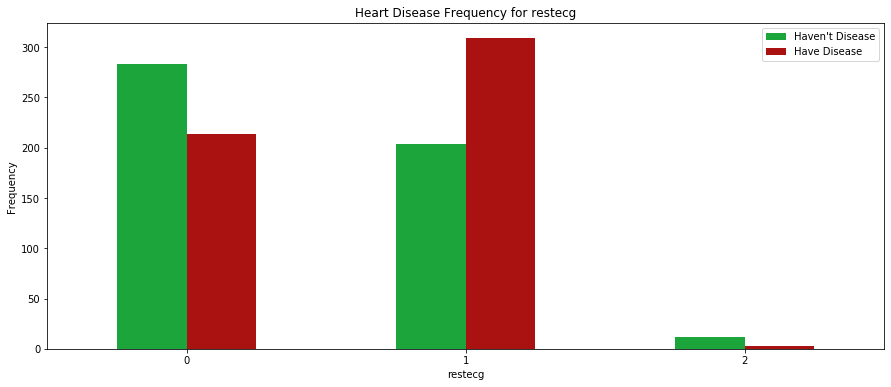

In [ ]:
pd.crosstab(train_df.restecg,train_df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('restecg')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

(14.0, 0.0)

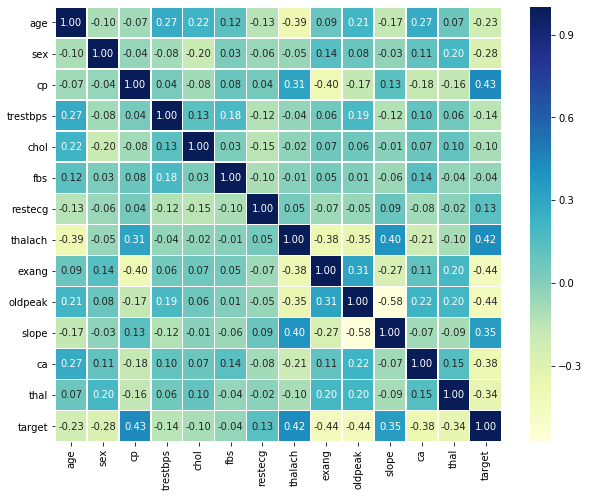

In [ ]:
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

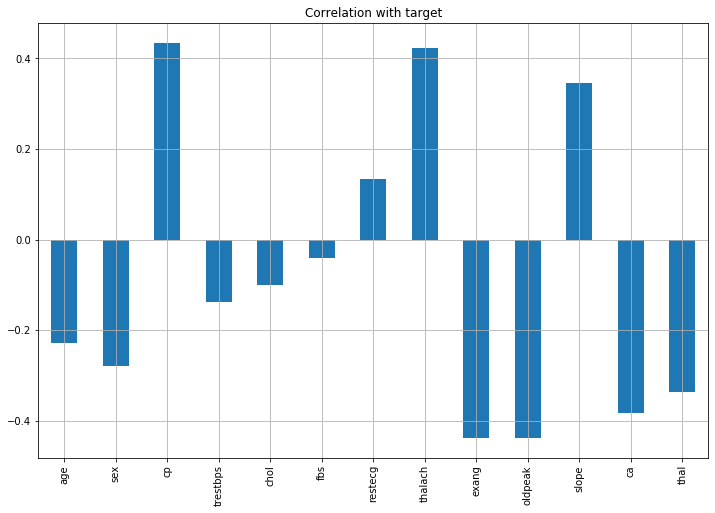

In [ ]:
train_df.drop('target', axis=1).corrwith(train_df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
target=train_df['target']
data = train_df.drop(['target'],axis=1)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=10)

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [ ]:
classifierRF=RandomForestClassifier()
classifierRF.fit(x_train,y_train)
acc=classifierRF.score(x_test, y_test)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 95.78%


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
classifierBa= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBa.fit(x_train,y_train)
classifierBa.score(x_test, y_test)

0.9545454545454546

In [ ]:
y_preds = classifierBa.predict(x_test)
print("bagging_accuracy score: ",accuracy_score(y_test, y_preds))

bagging_accuracy score:  0.9545454545454546


In [ ]:
Y_pred = classifierBa.predict(x_test).astype(int)
acc_bagging_classifier = round(classifierBa.score(x_train, y_train) * 100, 2)
acc_bagging_classifier

99.86

In [ ]:
acc_test_bagging_classifier = round(classifierBa.score(x_test, y_test) * 100, 2)
acc_test_bagging_classifier

95.45

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)


[[149   4]
 [ 10 145]]


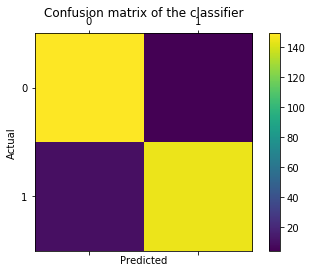

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       153
           1       0.97      0.94      0.95       155

    accuracy                           0.95       308
   macro avg       0.96      0.95      0.95       308
weighted avg       0.96      0.95      0.95       308



In [ ]:
data1=train_df.drop(['fbs', 'chol'], axis=1)
target1=train_df['target']
data1 = train_df.drop(['target'],axis=1)


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(data1, target1, test_size=0.3, random_state=10)

In [ ]:
classifierRF1=RandomForestClassifier()
classifierRF1.fit(x_train1,y_train1)
accuracy=classifierRF1.score(x_test1, y_test1)*100
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(accuracy))

Random Forest Algorithm Accuracy Score : 94.16%


C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
classifierBagging= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBagging.fit(x_train1,y_train1)
classifierBagging.score(x_test1, y_test1)

0.9383116883116883

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(x_train1, y_train1)
random_forest.fit(x_train1, y_train1)
acc_random_forest = round(random_forest.score(x_train1, y_train1) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 100}


In [ ]:
acc_test_random_forest = round(random_forest.score(x_test1, y_test1) * 100, 2)
acc_test_random_forest

96.1

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,9],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 400}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 400, max_depth=9, criterion='gini')

In [ ]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pred1=rfc1.predict(x_test)

In [ ]:
print("Accuracy for Random Forest is: ",accuracy_score(y_test,pred1))

Accuracy for Random Forest is:  0.961038961038961


In [ ]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       153
           1       0.95      0.95      0.95       155

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



In [ ]:
labels=[0,1]
cmx1=confusion_matrix(y_test1,pred1, labels)
print(cmx1)


[[146   7]
 [  8 147]]


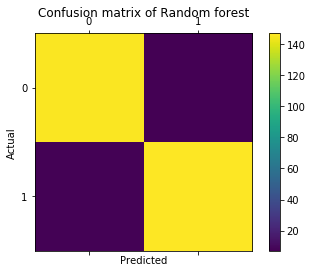

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx1)
plt.title('Confusion matrix of Random forest')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve

In [ ]:
roc_auc = roc_auc_score(y_test,pred1)
print('ROC AUC score: ',roc_auc)

ROC AUC score:  0.9611216529622602


In [ ]:
#Plotting the ROC AUC curve before and after tuning hyper parameters
print('ROC AUC curve before and after tuning hyper parameters:\n')
fpr_rf,tpr_rf,thre_rf = roc_curve(y_test,pred1)
fpr_rf1,tpr_rf1,thre_rf1 = roc_curve(y_test1,pred_rf1)
plt.clf()
ax = plt.subplot(111)
ax.plot(fpr_rf, tpr_rf,label="Without hyper parameter tuning")
ax.plot(fpr_rf1, tpr_rf1,label="With hyper parameter tuning")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
ax.legend()
plt.show()

In [ ]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
#max_depth = [5, 10, 15, 25, 30]
max_samples = [5, 10, 25, 50, 100,500]
max_features = [1, 2, 5, 10, 13]

#Creating a dictionary for the hyper parameters
hyperbag = dict(n_estimators = n_estimators, max_samples = max_samples, 
              max_features = max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridbag = GridSearchCV(classifierBa, hyperbag, cv = 5, verbose = 1, n_jobs = -1)
bestbag = gridbag.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  4.7min finished


In [ ]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridbag.best_params_)

The best hyper parameters are:
 {'max_features': 5, 'max_samples': 500, 'n_estimators': 100}


In [ ]:
#Fitting the bagging model with the best hyper parameters obtained through GridSearchCV
bagg1 = BaggingClassifier(max_features=5, max_samples=500,n_estimators= 100)
bagg1.fit(x_train,y_train)
pred_bagg1 = bagg1.predict(x_test)

In [ ]:
#Checking different metrics for bagging model after tuning the hyperparameters
print('Checking different metrics for bagging model after tuning the hyperparameters:\n')
print("Training accuracy: ",bagg1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_bagg1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_bagg1)
print('Confusion Matrix: \n',conf_mat)

class_rep2 = classification_report(y_test,pred_bagg1)
print('Classification Report: \n',class_rep2)

Checking different metrics for bagging model after tuning the hyperparameters:

Training accuracy:  1.0
Testing accuracy:  0.961038961038961
Confusion Matrix: 
 [[149   4]
 [  8 147]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.97      0.95      0.96       155

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



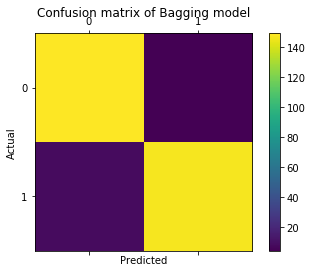

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax1 = ax.matshow(conf_mat)
plt.title('Confusion matrix of Bagging model')
fig.colorbar(cax1)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#Plotting the validation curve of training and testing scores for max_features
from sklearn.model_selection import validation_curve
param_range= max_features
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = param_range,cv = 5)

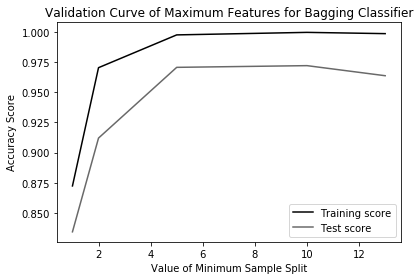

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Maximum Features for Bagging Classifier")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#Plotting the validation curve of training and testing scores for n_estimators
from sklearn.model_selection import validation_curve
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range,cv = 5)

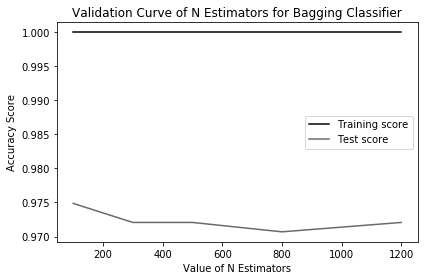

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of N Estimators for Bagging Classifier")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
param_range= max_samples
train_scores, test_scores = validation_curve(
                                BaggingClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_samples', 
                                param_range = param_range,cv = 5)

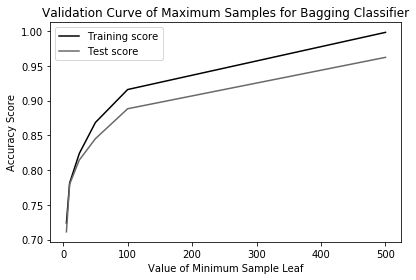

In [ ]:
# Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


# Create plot
plt.title("Validation Curve of Maximum Samples for Bagging Classifier")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#Setting values for the parameters
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 10, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

#Applying GridSearchCV to get the best value for hyperparameters
gridrf = GridSearchCV(classifierRF, hyper_rf, cv = 5, verbose = 1, n_jobs = -1)
bestrf = gridrf.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 13.4min finished


In [ ]:
#Printing the best hyperparameters
print('The best hyper parameters are:\n',gridrf.best_params_)

The best hyper parameters are:
 {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
rf1 = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=300)
rf1.fit(x_train,y_train)
pred_rf1 = rf1.predict(x_test)

In [ ]:
print('Checking different metrics for random forest model after tuning the hyperparameters:\n')
print("Training accuracy: ",rf1.score(x_train,y_train))
acc_score = accuracy_score(y_test, pred_rf1)
print('Testing accuracy: ',acc_score)
conf_mat = confusion_matrix(y_test, pred_rf1)
print('Confusion Matrix: \n',conf_mat)
class_rep3 = classification_report(y_test,pred_rf1)
print('Classification Report: \n',class_rep3)

Checking different metrics for random forest model after tuning the hyperparameters:

Training accuracy:  1.0
Testing accuracy:  0.961038961038961
Confusion Matrix: 
 [[149   4]
 [  8 147]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       153
           1       0.97      0.95      0.96       155

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



In [ ]:
from sklearn.model_selection import validation_curve
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range,cv = 5)

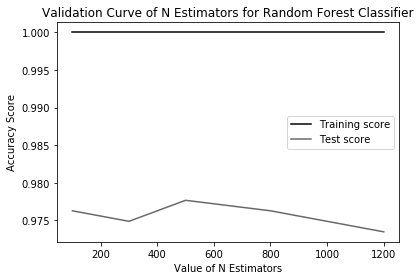

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of N Estimators for Random Forest Classifier")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#Plotting the validation curve of training and testing scores for max_depth
from sklearn.model_selection import validation_curve
param_range= max_depth
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,cv = 5)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

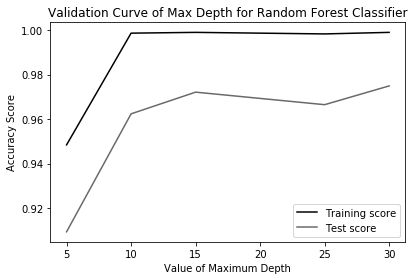

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Max Depth for Random Forest Classifier")
plt.xlabel("Value of Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#Plotting the validation curve of training and testing scores for min_samples_split
from sklearn.model_selection import validation_curve
param_range= min_samples_split
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range,cv = 5)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

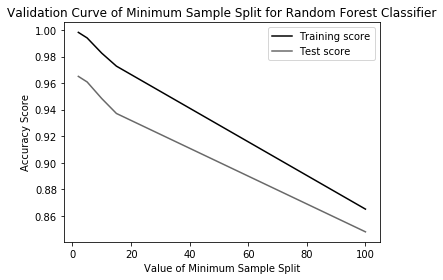

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Minimum Sample Split for Random Forest Classifier")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()